In [5]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
connection = mysql.connector.connect(
user='root',
password='root123',
host='localhost',
database='healthcare' # write here database name 
)

In [8]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [9]:
cursor.execute('SELECT * FROM Patients')
Patients = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


In [10]:
cursor.execute('SELECT * FROM Doctors')
Doctors = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


In [11]:
cursor.execute('SELECT * FROM Appointments ')
Appointments = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [12]:
cursor.execute('SELECT * FROM InsuranceInformation')
insurance = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [13]:
Patients.head()   # first table name Patients 

,patient_id,first_name,last_name,date_of_birth,gender,address,contact_number
0,1,John,Doe,1980-05-15,M,"123 Main St, Cityville",123-456-7890
1,2,Jane,Smith,1975-10-20,F,"456 Elm St, Townsville",987-654-3210
2,3,Emily,Johnson,1992-03-08,F,"789 Oak St, Villageton",456-789-0123
3,4,Michael,Williams,1988-11-25,M,"321 Pine St, Hilltown",789-012-3456
4,5,Sarah,Davis,1990-07-12,F,"567 Maple St, Riverside",234-567-8901


In [14]:
Doctors.head()  # second table name is Doctors

,doctor_id,first_name,last_name,specialty,contact_number,email
0,1,Dr. Michael,Johnson,Cardiology,555-123-4567,m.johnson@example.com
1,2,Dr. Sarah,Williams,Pediatrics,555-987-6543,s.williams@example.com
2,3,Dr. John,Doe,Orthopedics,555-555-5555,j.doe@example.com
3,4,Dr. Emily,Smith,Oncology,555-111-2222,e.smith@example.com
4,5,Dr. David,Brown,Neurology,555-333-4444,d.brown@example.com


In [15]:
Appointments.head() # third table name is Appointments

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,status
0,1,1,1,2024-04-21,0 days 09:00:00,confirmed
1,2,2,2,2024-04-22,0 days 10:30:00,confirmed
2,3,3,3,2024-04-23,0 days 11:00:00,confirmed
3,4,4,4,2024-04-24,0 days 13:45:00,pending
4,5,5,5,2024-04-25,0 days 14:30:00,confirmed


In [16]:
insurance.head() # fourth table name is insurance

,insurance_id,patient_id,insurance_company,policy_number,policy_holder_name,policy_expiry_date
0,1,1,ABC Insurance,123456,John Doe,2025-06-30
1,2,2,XYZ Insurance,987654,Jane Smith,2024-12-31
2,3,3,DEF Insurance,654321,Emily Johnson,2023-09-15
3,4,4,GHI Insurance,456789,Michael Brown,2026-03-20
4,5,5,JKL Insurance,789123,Jessica Taylor,2024-08-10


In [17]:
Appointments[Appointments['status'] == 'confirmed'] #Filter data based on a condition Appointments 'confirmed'

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,status
0,1,1,1,2024-04-21,0 days 09:00:00,confirmed
1,2,2,2,2024-04-22,0 days 10:30:00,confirmed
2,3,3,3,2024-04-23,0 days 11:00:00,confirmed
4,5,5,5,2024-04-25,0 days 14:30:00,confirmed
5,6,6,6,2024-04-26,0 days 15:15:00,confirmed
6,7,7,7,2024-04-27,0 days 16:00:00,confirmed
8,9,9,9,2024-04-29,0 days 09:30:00,confirmed
9,10,10,10,2024-04-30,0 days 10:00:00,confirmed
10,11,1,1,2024-05-01,0 days 11:30:00,confirmed
11,12,2,2,2024-05-02,0 days 12:15:00,confirmed


In [18]:
Doctors.groupby('doctor_id').size().reset_index(name='num_appointments')


,doctor_id,num_appointments
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [20]:
doctor_appointment_counts = Appointments['doctor_id'].value_counts() # Appointment count by doctor
print(doctor_appointment_counts)

1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
Name: doctor_id, dtype: int64


In [21]:
# Policy holder distribution
policy_holder_distribution = insurance['policy_holder_name'].value_counts()
print(policy_holder_distribution)

John Doe             1
Jane Smith           1
Emily Johnson        1
Michael Brown        1
Jessica Taylor       1
David Garcia         1
Sarah Martinez       1
Andrew Wilson        1
Laura Robinson       1
Samantha Anderson    1
Name: policy_holder_name, dtype: int64


In [22]:
# Policy expiry analysis
policy_expiry_distribution = insurance['policy_expiry_date'].value_counts()
print(policy_expiry_distribution)

2025-06-30    1
2024-12-31    1
2023-09-15    1
2026-03-20    1
2024-08-10    1
2025-05-05    1
2023-11-30    1
2024-04-25    1
2026-01-15    1
2024-10-01    1
Name: policy_expiry_date, dtype: int64


In [24]:
# Insurance company distribution
company_distribution = insurance['insurance_company'].value_counts()
print(company_distribution)

ABC Insurance    1
XYZ Insurance    1
DEF Insurance    1
GHI Insurance    1
JKL Insurance    1
MNO Insurance    1
PQR Insurance    1
STU Insurance    1
VWX Insurance    1
YZA Insurance    1
Name: insurance_company, dtype: int64


In [26]:
# Extract email domains
Doctors['email_domain'] = Doctors['email'].str.split('@').str[1]
email_domain_distribution = Doctors['email_domain'].value_counts() # Email domain distribution
print(email_domain_distribution)

example.com    12
Name: email_domain, dtype: int64


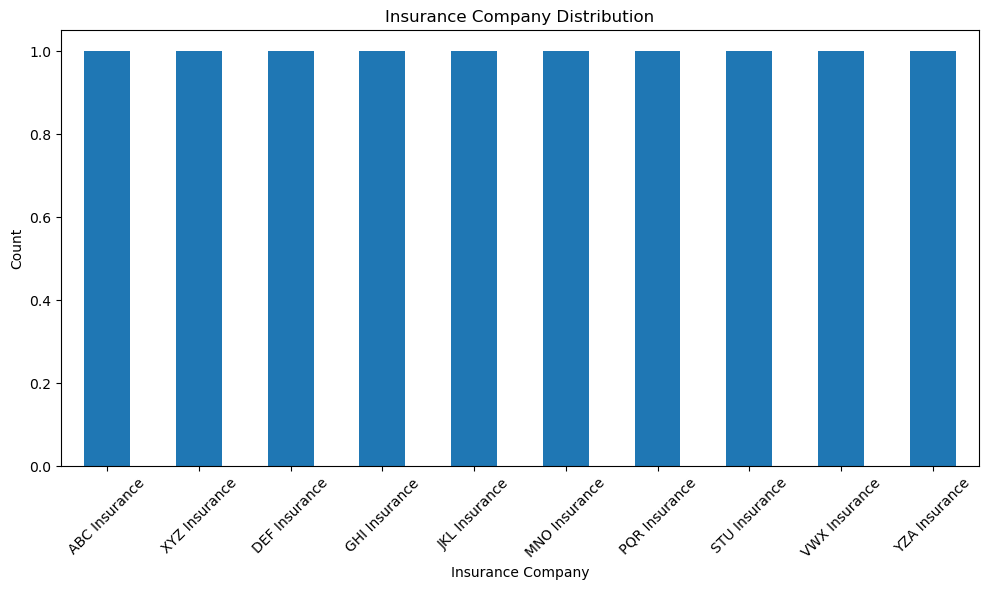

In [27]:
# Plot insurance company distribution
plt.figure(figsize=(10, 6))
insurance['insurance_company'].value_counts().plot(kind='bar')
plt.title('Insurance Company Distribution')
plt.xlabel('Insurance Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

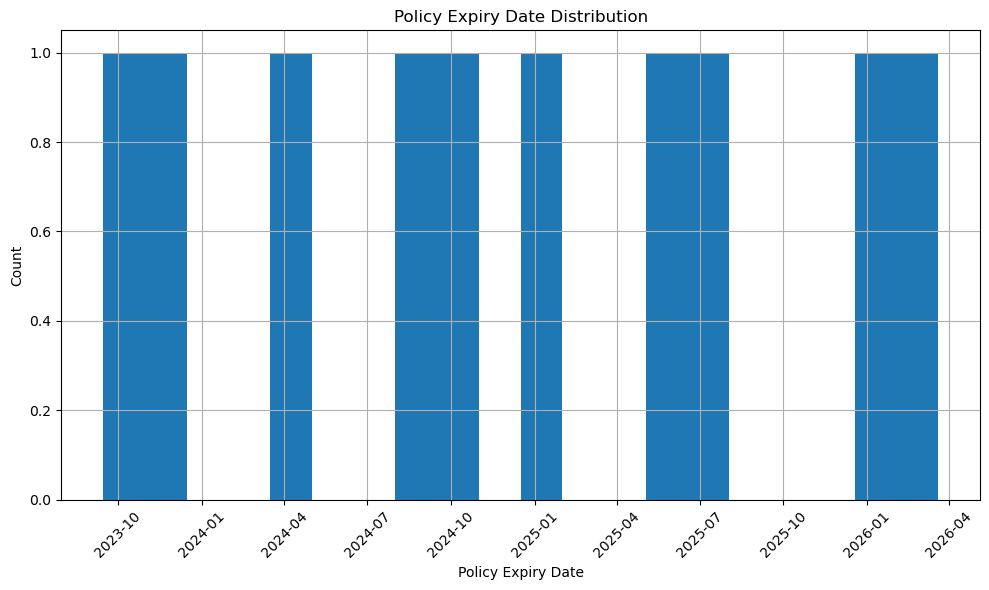

In [28]:
# Plot policy expiry distribution
plt.figure(figsize=(10, 6))
insurance['policy_expiry_date'].hist(bins=20)
plt.title('Policy Expiry Date Distribution')
plt.xlabel('Policy Expiry Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


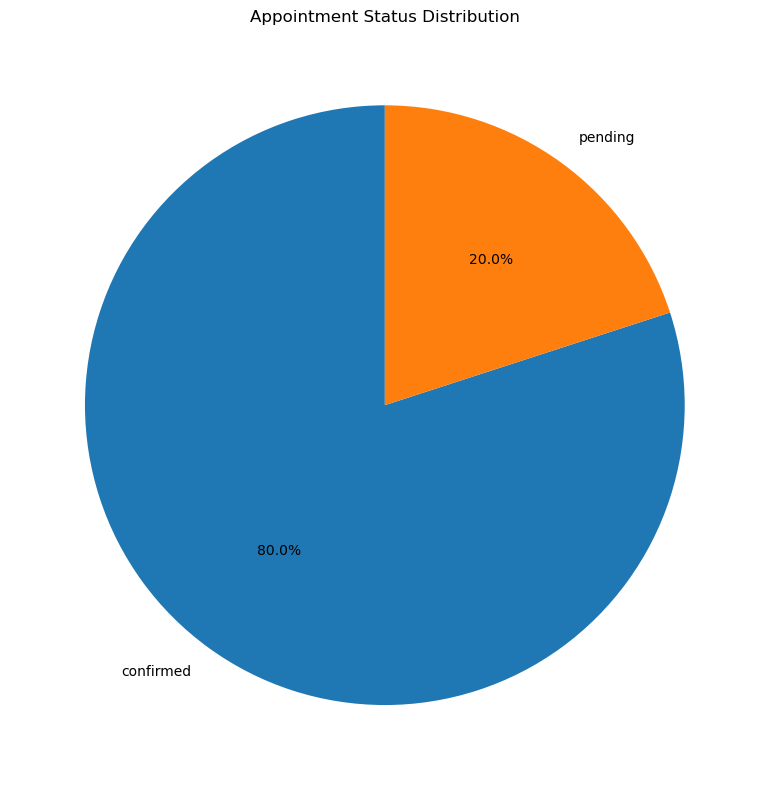

In [29]:
# Plot appointment status distribution
plt.figure(figsize=(8, 8))
status_distribution = Appointments['status'].value_counts()
status_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Appointment Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

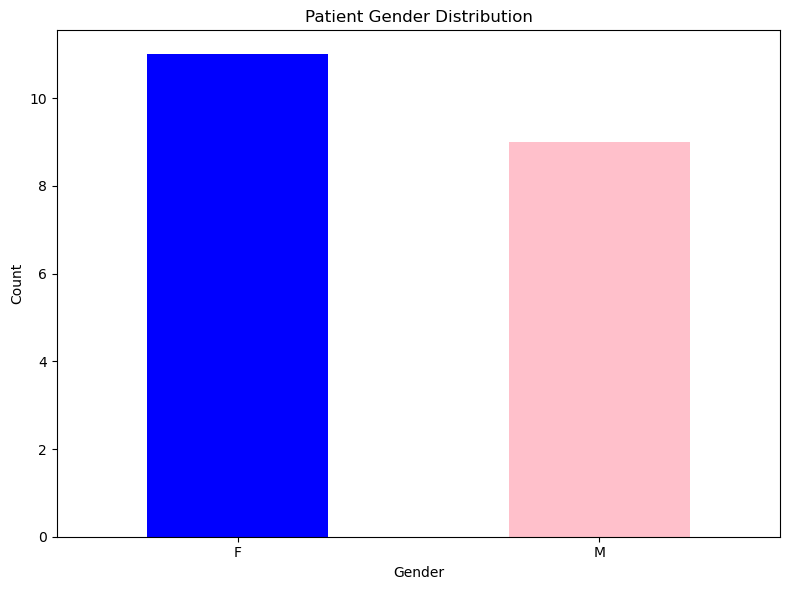

In [32]:
# Calculate gender distribution
gender_distribution = Patients['gender'].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color=['blue', 'pink'])
plt.title('Patient Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

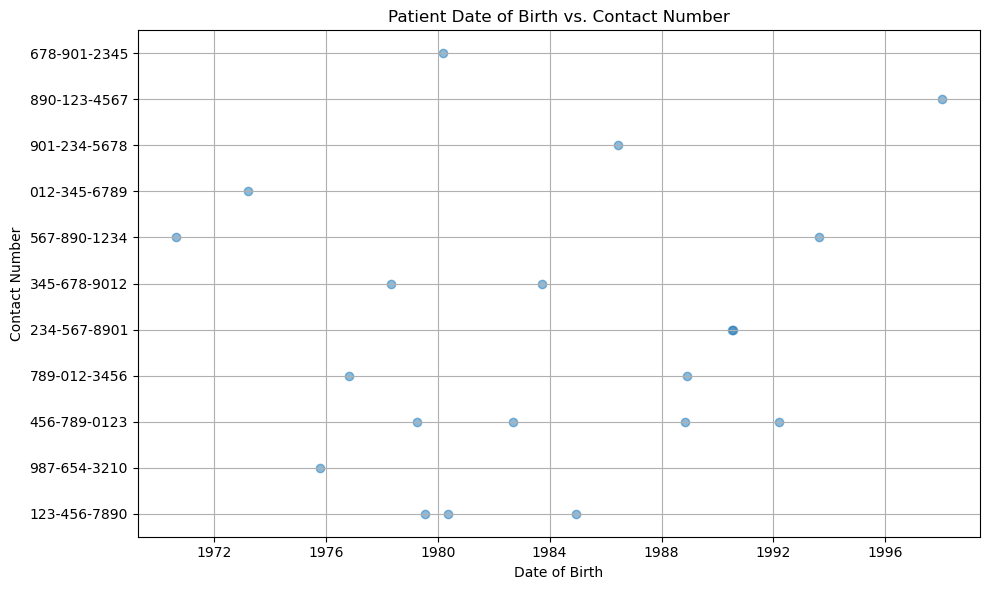

In [35]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Patients['date_of_birth'], Patients['contact_number'], alpha=0.5)
plt.title('Patient Date of Birth vs. Contact Number')
plt.xlabel('Date of Birth')
plt.ylabel('Contact Number')
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()